In [2]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

# Warm up
Consider the function $f (x, y) = e^x e^y$. Approximate this function on $X = [0, 1] \times [−1, 0]$ using the projection algorithm discussed in class (use collocation with Chebyshev polynomials). Now approximate the function $g(x) = \max \{0, x − 1 \}$ on $X = [0, 2]$ using the same algorithm. Consider $n = p = 3$, $n = p = 5$, $n = p = 10$, $n = p = 20$. Plot these four approximations as a function of $x$, along with the true function.

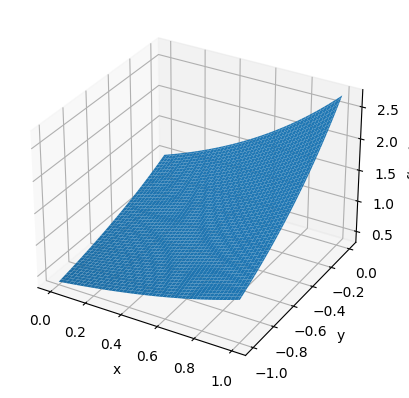

In [3]:
%matplotlib inline

def f(x, y):
    return np.exp(x) * np.exp(y)

# Define the grid
num_points = 100
x_min, x_max = 0, 1
y_min, y_max = -1, 0
x_grid, y_grid = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Evaluate the function on the grid
z_grid = f(x_grid, y_grid)

# Plot the surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x_grid, y_grid, z_grid)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
plt.show()
plt.close()


In [ ]:
%matplotlib inline

def g(x):
    return np.maximum(0, x - 1)

# Define the grid
num_points = 100
x_min, x_max = 0, 2
x_grid = np.linspace(x_min,x_max,num_points)

# Evaluate the function on the grid
y_grid = f(x_grid)

# Plot the surface
fig = plt.figure()
ax.plot(x_grid, y_grid)
ax.set_xlabel('x')
ax.set_ylabel('g(x)')
plt.show()
plt.close()

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def chebyshev_collocation(n, x_min=-1, x_max=1):
    """Compute the Chebyshev-Gauss-Lobatto collocation nodes and differentiation matrix."""
    nodes = np.cos( ((2 * (np.arange(n)+1) ) - 1)/ (2 * n) * np.pi )
    D = np.zeros((n+1, n+1))
    for i in range(n+1):
        for j in range(n+1):
            if i != j:
                D[i,j] = (nodes[i] / (1 - nodes[i]**2)) * ((-1)**(i+j)) / ((nodes[i] - nodes[j]) + 1e-15)
            elif i == 0 or i == n:
                D[i,i] = 0.5 * (n**2)
            else:
                D[i,i] = -nodes[i] / (2*(1 - nodes[i]**2))
    return nodes, D

def project(f, X, n, p):
    """Approximate the function f on the rectangle X using Chebyshev collocation."""
    x_nodes, Dx = chebyshev_collocation(n, X[0,0], X[0,1])
    if X.shape[0] == 2:
        y_nodes, Dy = chebyshev_collocation(p, X[1,0], X[1,1])
    else:
        y_nodes, Dy = chebyshev_collocation(p, X[0,0], X[0,1])
    F = np.zeros((n+1, p+1))
    for i in range(n+1):
        for j in range(p+1):
            F[i,j] = f(x_nodes[i], y_nodes[j])
    C = np.linalg.inv(Dx) @ F @ np.linalg.inv(Dy.T)
    return lambda x, y: np.polynomial.chebyshev.chebval(x, np.flip(C[:,0], 0)) * np.polynomial.chebyshev.chebval(y, np.flip(C[0,:], 0))

In [28]:
# chebyshev_collocation(2)
D = np.zeros((2+1, 2+1))
D

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [ ]:
# Define the functions to be approximated
f = lambda x, y: np.exp(x) * np.exp(y)
g = lambda x: np.maximum(0, x - 1)

def f(x, y):
    return np.exp(x) * np.exp(y)

def g(x):
    return np.maximum(0, x - 1)

# Define the intervals for approximation
X1 = np.array([[0, 1], [-1, 0]])
X2 = np.array([[0, 2]])

# Define the degrees of the Chebyshev polynomials
n_values = [3, 5, 10, 20]
p_values = [3, 5, 10, 20]

# Allocate space for the results
F = np.zeros((len(n_values), len(p_values)), dtype=object)
G = np.zeros((len(n_values), len(p_values)), dtype=object)

# Compute the approximations
for i, n in enumerate(n_values):
    for j, p in enumerate(p_values):
        F[i,j] = project(f, X1, n, p)
        G[i,j] = project(g, X2, n, p)

# Plot the results
fig, axs = plt.subplots(len(n_values), len(p_values), figsize=(12, 12), sharex=True, sharey=True)

for i in range(len(n_values)):
    for j in range(len(p_values)):
        ax = axs[i,j]
        ax.set_title(f"$n={n_values[i]}, p={p_values[j]}$")

        x, y = np.meshgrid(np.linspace(-1, 1, 101), np.linspace(-1, 1, 101))
        z1 = F[i,j](x, y)
        z2 = G[i,j](x, y)

        ax.contourf(x, y, z1, 20, cmap='viridis')
        ax.contour(x, y, z1, 20, colors='black', linewidths=0.5)
        ax.contour(x, y, z2, [0.5], colors='red', linewidths=2)

plt.show()